In [1]:
%matplotlib inline
import ast
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import numpy as np
import math
import scipy
from matplotlib import rc
rc('text', usetex=True)
sns.set_style("white")
sns.set_style("ticks")

In [2]:
parameter_list = []
triallist = []
elonglist = [0.05]
motiflist = ['10000','00001']
biaslist = [0.5,0.7,0.9]
for elong in range(len(elonglist)):
    triallist.append([])
    for bias in range(len(biaslist)):
        triallist[elong].append([])
        for motif in range(len(motiflist)):
            triallist[elong][bias].append([])
            file_name = "../data/MotifSimulation_TESTA_TrackedData_motif"+motiflist[motif]+"_len7_bias"+str(biaslist[bias])+"_elong"+str(elonglist[elong])+"_25trials_numRound4000.csv"


            with open(file_name) as f:
                handle = csv.reader(f)
                line_counter = 0
                trial_tracker = -1
                for line in handle:
                    new_line = []
                    if line_counter == 0:
                        for word in line:
                            parameter_list.append(word)
                        line_counter += 1
                    elif 'Trial' in line[0]:
                        triallist[elong][bias][motif].append({})
                        trial_tracker += 1
                    else:
                        for word in line:
                            new_line.append(ast.literal_eval(word))
                        triallist[elong][bias][motif][trial_tracker][new_line[0]] = {'nr_motifs':new_line[1]}
                        if len(new_line) ==3:
                            triallist[elong][bias][motif][trial_tracker][new_line[0]]['daughters'] = new_line[2]
                        else:
                            triallist[elong][bias][motif][trial_tracker][new_line[0]]['daughters'] = None
                

KeyboardInterrupt: 

In [257]:
start_zero = []
for elong in range(len(elonglist)):
    start_zero.append([])
    for bias in range(len(biaslist)):
        start_zero[elong].append([])
        for motif in range(len(motiflist)):
            start_zero[elong][bias].append([])
            for trial in range(len(triallist[elong][bias][motif])):
                start_zero[elong][bias][motif].append([])
                for cell,content_dict in triallist[elong][bias][motif][trial].iteritems():
            #         print cell
            #         print content_dict['nr_motifs']
                    if content_dict['nr_motifs'][0]==0 and 1 in content_dict['nr_motifs']:
                        start_zero[elong][bias][motif][trial].append(content_dict['nr_motifs'])
    

In [258]:
time_tracker = []
inbetween_times = []
for elong in range(len(elonglist)):
    time_tracker.append([])
    inbetween_times.append([])
    for bias in range(len(biaslist)):
        time_tracker[elong].append([])
        inbetween_times[elong].append([])
        for motif in range(len(motiflist)):
            time_tracker[elong][bias].append([])
            inbetween_times[elong][bias].append([])
            for item in range(1,101):
                time_tracker[elong][bias][motif].append([])
                inbetween_times[elong][bias][motif].append([])
                for trial in range(len(start_zero[elong][bias][motif])):
                    
                    for cell in range(len(start_zero[elong][bias][motif][trial])):
                            if item in start_zero[elong][bias][motif][trial][cell]:
                                time_tracker[elong][bias][motif][item-1].append(start_zero[elong][bias][motif][trial][cell].index(item))
                                if item -1 in start_zero[elong][bias][motif][trial][cell]:
                                    inbetween_times[elong][bias][motif][item-1].append(start_zero[elong][bias][motif][trial][cell].index(item)-start_zero[elong][bias][motif][trial][cell].index(item-1))
                                else:
                                    inbetween_times[elong][bias][motif][item-1].append(0)

In [259]:
average_arrival_time = []
average_between_time = []
stderr_between_time = []
for elong in range(len(elonglist)):
    average_arrival_time.append([])
    average_between_time.append([])
    stderr_between_time.append([])
    for bias in range(len(biaslist)):
        average_arrival_time[elong].append([])
        average_between_time[elong].append([])
        stderr_between_time[elong].append([])
        for motif in range(len(motiflist)):
            average_arrival_time[elong][bias].append([])
            average_between_time[elong][bias].append([])
            stderr_between_time[elong][bias].append([])
            for item in range(len(time_tracker[elong][bias][motif])):
                average_arrival_time[elong][bias][motif].append(np.mean(time_tracker[elong][bias][motif][item]))
                average_between_time[elong][bias][motif].append(np.mean(inbetween_times[elong][bias][motif][item]))
                stderr_between_time[elong][bias][motif].append(1.96*math.sqrt(np.var(inbetween_times[elong][bias][motif][item])/len(inbetween_times[elong][bias][motif][item])))

([<matplotlib.axis.XTick at 0x17bd778d0>,
 <a list of 9 Text xticklabel objects>)

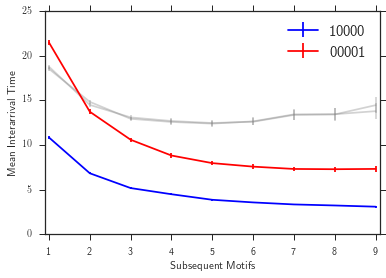

In [262]:
elong = 0
time = 10
plt.figure()
plt.errorbar(range(2,time+1),average_between_time[elong][0][0][1:time],yerr=stderr_between_time[elong][0][0][1:time],color='gray',alpha=0.35)
plt.errorbar(range(2,time+1),average_between_time[elong][0][1][1:time],yerr=stderr_between_time[elong][0][1][1:time],color='gray',alpha=0.35)
plt.errorbar(range(2,time+1),average_between_time[elong][2][0][1:time],yerr=stderr_between_time[elong][2][0][1:time],color='b',label=motiflist[0])
plt.errorbar(range(2,time+1),average_between_time[elong][2][1][1:time],yerr=stderr_between_time[elong][2][1][1:time],color='r',label=motiflist[1])
plt.ylabel('Mean Interarrival Time')
plt.xlabel('Subsequent Motifs')
plt.legend(loc='upper right',fontsize=15)
plt.xlim(1.9,time+.1)
plt.xticks(range(2,time+1),range(1,time))
# plt.savefig('motifinterarrival_subsequent_usetex_errorbar_4000round_25trials.pdf',rasterized=True,bbox_inches='tight')